In [1]:
#Setting up path in Intel Dev Cloud
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys


sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


Testing on <a href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI* TANK AIOT DEVELOPER KIT</a>

List of devices available to test are available <a href="https://devcloud.intel.com/edge/get_started/devcloud/">here</a>


In [2]:
#Creating a function to submit job
model_path = '/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013'
video_path = '/data/resources/retail.mp4'
queue_param = '/data/queue_param/retail.npy'
Max_people = 2

def submit_job(device,node_name):
    device_name = device
    if device_name.startswith('HETERO:FPGA'):
        device_name = 'FPGA'
        
    
    Output_path = '/output/results/retail/'+ device_name
    flag = '{} {} {} {} {} {}'.format(model_path,device,video_path,queue_param,Output_path,Max_people)
    
    job_name = "retail_"+device_name
    
    job_ID = !qsub queue_job.sh -l nodes=1:{node_name} -d . -F "{flag}" -N job_name

    return job_ID


<h2>1. Submitting a job to run on CPU - 
<a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel® Core™ i5-6500TE Processor</a></h2>

In [3]:
CPU_job_ID = submit_job('CPU', 'tank-870:i5-6500te')
print("CPU: ",CPU_job_ID)

CPU:  ['vRCPWchN5ERJ2OeLMumzdhFu7yPzm9dU']


In [5]:
import liveQStat
import get_results
import videoHtml

In [7]:
#Checking Job status
liveQStat.liveQStat()

In [6]:
#retrieving job result
get_results.getResults(CPU_job_ID[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:vRCPWchN5ERJ2OeLMumzdhFu7yPzm9dU) are ready.
Please wait................Success!
output.tgz was downloaded in the same folder as this notebook.


In [ ]:
#Unpacking output files and viewing stdout.log

!tar zxf output.tgz
!cat stdout.log


In [ ]:
#Viewing error log
!cat stderr.log

In [ ]:
#Viewing output video

videoHtml.videoHTML('Retail CPU', ['results/retail/CPU/output_video.mp4'])

<h2>2. Submitting a job to run on Integrated GPU - 
<a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel® HD Graphics 530</a></h2>

In [13]:
job_ID = submit_job('GPU', 'tank-870:i5-6500te:intel-hd-530')
print("GPU: ",job_ID)

#retrieving job result
get_results.getResults(job_ID[0], filename='output.tgz', blocking=True)

#Unpacking output files and viewing stdout.log
!tar zxf output.tgz

CPU:  ['dtdp3X7bwoWYwMJ8yWUGwQApBqdKD5US']
getResults() is blocking until results of the job (id:dtdp3X7bwoWYwMJ8yWUGwQApBqdKD5US) are ready.
Please wait.......................................................................Success!
output.tgz was downloaded in the same folder as this notebook.


In [ ]:
#Viewing output video

videoHtml.videoHTML('Retail GPU', ['results/retail/GPU/output_video.mp4'])

<h2>3. Submitting a job to run on VPU - <a href="https://software.intel.com/en-us/neural-compute-stick">Intel Neural Compute Stick 2</a></h2>

In [15]:
job_ID = submit_job('MYRIAD', 'tank-870:i5-6500te:intel-ncs2')
print("VPU: ",job_ID)

#retrieving job result
get_results.getResults(job_ID[0], filename='output.tgz', blocking=True)

#Unpacking output files and viewing stdout.log
!tar zxf output.tgz

VPU:  ['oEyEfDY8jmqz5PF4IG5tpzWB1T4vjNxd']
getResults() is blocking until results of the job (id:oEyEfDY8jmqz5PF4IG5tpzWB1T4vjNxd) are ready.
Please wait................................................Success!
output.tgz was downloaded in the same folder as this notebook.


In [ ]:
#Viewing output video

videoHtml.videoHTML('Retail VPU', ['results/retail/MYRIAD/output_video.mp4'])

<h2>4. Submitting a job to run on FPGA - <a href="https://www.ieiworld.com/mustang-f100/en/">IEI Mustang-F100-A10 </a></h2>

In [21]:
job_ID = submit_job('HETERO:FPGA,CPU', 'tank-870:i5-6500te:iei-mustang-f100-a10')
print("FPGA: ",job_ID)

#retrieving job result
get_results.getResults(job_ID[0], filename='output.tgz', blocking=True)

#Unpacking output files and viewing stdout.log
!tar zxf output.tgz

FPGA:  ['3prpkZPyFQx55IvDsrU9AxMhvoosASCj']
getResults() is blocking until results of the job (id:3prpkZPyFQx55IvDsrU9AxMhvoosASCj) are ready.
Please wait................................................Success!
output.tgz was downloaded in the same folder as this notebook.


In [ ]:
#Viewing output video

videoHtml.videoHTML('Retail FPGA', ['results/retail/FPGA/output_video.mp4'])

# Assess Performance

In [1]:
import matplotlib.pyplot as plt

device_list=['CPU', 'GPU', 'FPGA', 'MYRIAD']
inference_time=[]
fps=[]
model_load_time=[]

for device in device_list:
    with open('results/retail/'+device+'/stats.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))
        


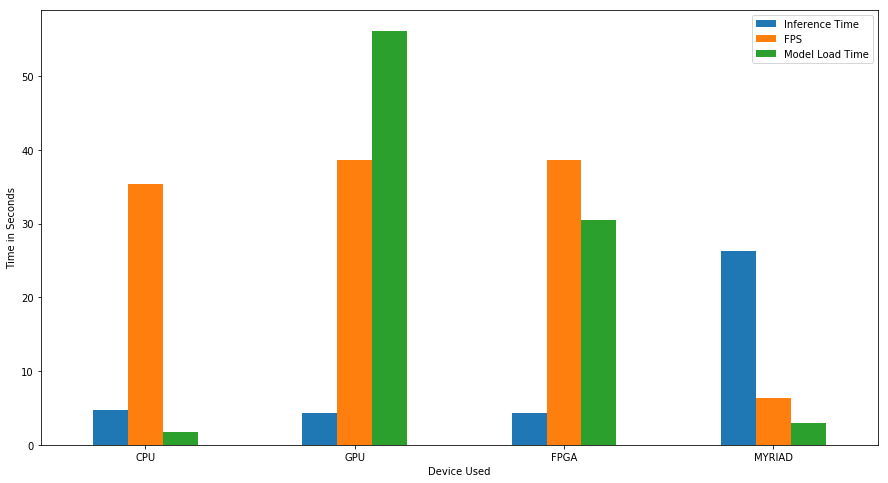

In [31]:
import pandas as pd

plt.rc('figure', figsize=(15, 8))
index = device_list
df = pd.DataFrame({'Inference Time': inference_time,
                   'FPS': fps,
                   'Model Load Time': model_load_time}, index=index)
ax = df.plot.bar(rot=0)


plt.xlabel("Device Used")
plt.ylabel("Time in Seconds")
plt.show()

In [34]:
df

,Inference Time,FPS,Model Load Time
CPU,4.7,35.319149,1.701377
GPU,4.3,38.604651,56.161894
FPGA,4.3,38.604651,30.462669
MYRIAD,26.3,6.311787,2.927683
